In [1]:
def OptimalSearchTree(p, n):
    # Initialize arrays
    A = [[0] * (n + 1) for _ in range(n + 2)]
    root = [[0] * (n + 1) for _ in range(n + 1)]
    
    # Initialization
    for i in range(1, n + 1):
        A[i][i - 1] = 0
        A[i][i] = p[i-1]
        root[i][i] = i
    A[n + 1][n] = 0

    # Compute entries
    for diagonal in range(1, n):
        for i in range(1, n - diagonal + 1):
            j = i + diagonal
            # Find minimum value of A[i][k-1] + A[k+1][j]
            min_val = float('inf')
            min_k = -1
            for k in range(i, j + 1):
                val = A[i][k - 1] + A[k + 1][j]
                if val < min_val:
                    min_val = val
                    min_k = k
            A[i][j] = min_val + sum(p[i-1:j])  # Adjust indexing of p for Python
            root[i][j] = min_k
    
    searchTime = A[1][n]
    return searchTime, root

# Example usage:
# Probabilities of keys
p = [0.1, 0.2, 0.4, 0.3]
n = len(p)

searchTime, root = OptimalSearchTree(p, n)

print("Optimal search time:", searchTime)
print("Root matrix:")
for row in root:
    print(row)


Optimal search time: 1.7
Root matrix:
[0, 0, 0, 0, 0]
[0, 1, 2, 3, 3]
[0, 0, 2, 3, 3]
[0, 0, 0, 3, 3]
[0, 0, 0, 0, 4]


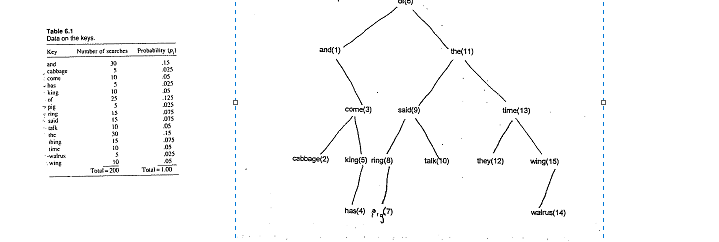

In [2]:

# Given probabilities from the table
p = [0.15, 0.025, 0.05, 0.025, 0.05, 0.125, 0.025, 0.075, 0.075, 0.05, 0.15, 0.075, 0.05, 0.025, 0.05]
n = len(p)

searchTime, root = OptimalSearchTree(p, n)

print("Optimal search time:", searchTime)
print("Root matrix:")
import pprint
pprint.pprint(root)

Optimal search time: 2.925
Root matrix:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6],
 [0, 0, 2, 3, 3, 3, 5, 6, 6, 6, 6, 6, 9, 9, 9, 11],
 [0, 0, 0, 3, 3, 3, 5, 6, 6, 6, 6, 9, 9, 9, 9, 11],
 [0, 0, 0, 0, 4, 5, 6, 6, 6, 6, 6, 9, 9, 9, 9, 11],
 [0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 9, 9, 9, 11, 11],
 [0, 0, 0, 0, 0, 0, 6, 6, 6, 8, 8, 9, 9, 11, 11, 11],
 [0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 9, 9, 11, 11, 11, 11],
 [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 9, 9, 11, 11, 11, 11],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 11, 11, 11, 11, 11],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 11, 11, 11, 11, 11],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 13],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 13, 13],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 15],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15]]


In [3]:
def print_tree(root_matrix, start, end, keys, level=0, side="root"):
    if start > end:
        return
    root_index = root_matrix[start][end]
    indent = " " * (4 * level)
    print(f"{indent}{side}: {keys[root_index-1]}")
    print_tree(root_matrix, start, root_index-1, keys, level + 1, "left")
    print_tree(root_matrix, root_index + 1, end, keys, level + 1, "right")

def optimal_search_tree(probabilities, num_keys):
    # Initialize cost and root matrices
    cost_matrix = [[0] * (num_keys + 1) for _ in range(num_keys + 2)]
    root_matrix = [[0] * (num_keys + 1) for _ in range(num_keys + 1)]
    
    # Initialization of single keys
    for i in range(1, num_keys + 1):
        cost_matrix[i][i - 1] = 0
        cost_matrix[i][i] = probabilities[i-1]
        root_matrix[i][i] = i
    cost_matrix[num_keys + 1][num_keys] = 0

    # Compute the optimal costs and roots for subtrees
    for diagonal in range(1, num_keys):
        for i in range(1, num_keys - diagonal + 1):
            j = i + diagonal
            # Find minimum cost for the subtrees
            min_cost = float('inf')
            best_root = -1
            for k in range(i, j + 1):
                cost = cost_matrix[i][k - 1] + cost_matrix[k + 1][j]
                if cost < min_cost:
                    min_cost = cost
                    best_root = k
            cost_matrix[i][j] = min_cost + sum(probabilities[i-1:j])  # Adjust indexing of probabilities for Python
            root_matrix[i][j] = best_root
    
    optimal_cost = cost_matrix[1][num_keys]
    return optimal_cost, root_matrix

# Given probabilities from the table
keys = ["and", "cabbage", "come", "has", "king", "of", "pig", "ring", "said", "talk", "the", "thing", "time", "walrus", "wing"]
probabilities = [0.15, 0.025, 0.05, 0.025, 0.05, 0.125, 0.025, 0.075, 0.075, 0.05, 0.15, 0.075, 0.05, 0.025, 0.05]
num_keys = len(probabilities)

optimal_cost, root_matrix = optimal_search_tree(probabilities, num_keys)

print("Optimal search time:", optimal_cost)
print("Binary Search Tree:")
print_tree(root_matrix, 1, num_keys, keys)


Optimal search time: 2.925
Binary Search Tree:
root: of
    left: and
        right: come
            left: cabbage
            right: king
                left: has
    right: the
        left: said
            left: ring
                left: pig
            right: talk
        right: time
            left: thing
            right: wing
                left: walrus


In [11]:
import pprint
import pandas as pd

cost_matrix = [[0] * (num_keys + 1) for _ in range(num_keys + 2)]
root_matrix = [[0] * (num_keys + 1) for _ in range(num_keys + 1)]
def last_three_decimals(num):
    return int(num * 1000) % 1000

def print_tree(root_matrix, start, end, keys, level=0, side="root"):
    
    if start > end:
        return
    root_index = root_matrix[start][end]
    indent = " " * (4 * level)
    print(f"{indent}{side}: {keys[root_index-1]} | {root_index} | {(cost_matrix[start][end])}")
    print_tree(root_matrix, start, root_index-1, keys, level + 1, "left")
    print_tree(root_matrix, root_index + 1, end, keys, level + 1, "right")

def optimal_search_tree(probabilities, num_keys):
    # Initialize cost and root matrices
    
    # Initialization of single keys
    for i in range(1, num_keys + 1):
        cost_matrix[i][i - 1] = 0
        cost_matrix[i][i] = probabilities[i-1]
        root_matrix[i][i] = i
    cost_matrix[num_keys + 1][num_keys] = 0

    # Compute the optimal costs and roots for subtrees
    for diagonal in range(1, num_keys):
        for i in range(1, num_keys - diagonal + 1):
            j = i + diagonal
            # Find minimum cost for the subtrees
            min_cost = float('inf')
            best_root = -1
            for k in range(i, j + 1):
                cost = cost_matrix[i][k - 1] + cost_matrix[k + 1][j]
                if cost < min_cost:
                    print(f"Cost from {i} to {j} with root {k}: {cost}")    
                    min_cost = cost
                    best_root = k
            cost_matrix[i][j] = min_cost + sum(probabilities[i-1:j])  # Adjust indexing of probabilities for Python
            root_matrix[i][j] = best_root
            
        print('df cost')    
        df_cost = pd.DataFrame(cost_matrix)
        print(df_cost)
        print('df root')
        df_root = pd.DataFrame(root_matrix)
        print(df_root)
        print()
        
        print()
        
    optimal_cost = cost_matrix[1][num_keys]
    return optimal_cost, root_matrix

# Given probabilities from the table
keys = ["and", "cabbage", "come", "has", "king", "of", "pig", "ring", "said", "talk", "the", "thing", "time", "walrus", "wing"]
probabilities = [0.15, 0.025, 0.05, 0.025, 0.05, 0.125, 0.025, 0.075, 0.075, 0.05, 0.15, 0.075, 0.05, 0.025, 0.05]
num_keys = len(probabilities)

optimal_cost, root_matrix = optimal_search_tree(probabilities, num_keys)

print("Optimal search time:", optimal_cost)
print("Binary Search Tree:")
print_tree(root_matrix, 1, num_keys, keys)


Cost from 1 to 2 with root 1: 0.025
Cost from 2 to 3 with root 2: 0.05
Cost from 2 to 3 with root 3: 0.025
Cost from 3 to 4 with root 3: 0.025
Cost from 4 to 5 with root 4: 0.05
Cost from 4 to 5 with root 5: 0.025
Cost from 5 to 6 with root 5: 0.125
Cost from 5 to 6 with root 6: 0.05
Cost from 6 to 7 with root 6: 0.025
Cost from 7 to 8 with root 7: 0.075
Cost from 7 to 8 with root 8: 0.025
Cost from 8 to 9 with root 8: 0.075
Cost from 9 to 10 with root 9: 0.05
Cost from 10 to 11 with root 10: 0.15
Cost from 10 to 11 with root 11: 0.05
Cost from 11 to 12 with root 11: 0.075
Cost from 12 to 13 with root 12: 0.05
Cost from 13 to 14 with root 13: 0.025
Cost from 14 to 15 with root 14: 0.05
Cost from 14 to 15 with root 15: 0.025
df cost
    0     1      2     3      4     5      6      7      8      9      10  \
0    0  0.00  0.000  0.00  0.000  0.00  0.000  0.000  0.000  0.000  0.000   
1    0  0.15  0.200  0.00  0.000  0.00  0.000  0.000  0.000  0.000  0.000   
2    0  0.00  0.025  0.10  